In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('telco-customer-churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df["TotalCharges"] = (pd.to_numeric(df["TotalCharges"],errors="coerce"))

In [9]:
df = df.drop('customerID', axis=1)

In [10]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [11]:
df.dropna(inplace=True)

In [12]:
for column in df:
    if df[column].dtypes == 'object':
        print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Categorical Data

In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns

### Gender

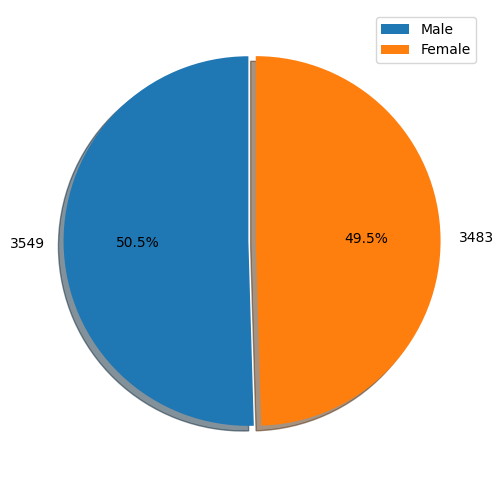

In [16]:
genders = df['gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(genders, 
        labels = genders.values,         
        explode = [0.02,0.02],
        autopct ='%1.1f%%',
        shadow = True,
        startangle = 90,
        )
plt.legend(genders.index)
plt.show()

### Phone

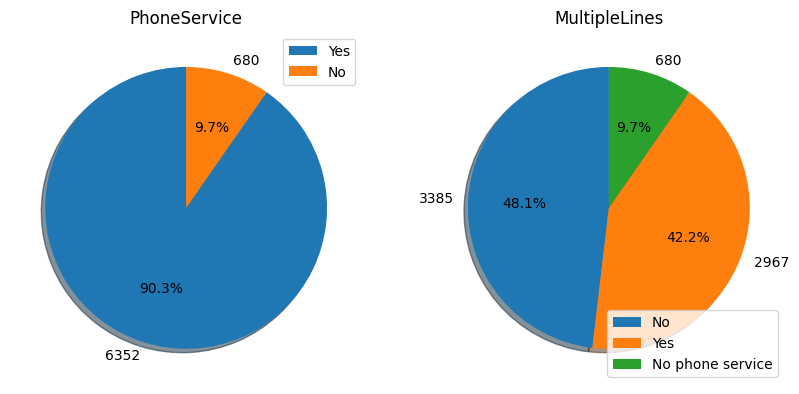

In [17]:
phone = ['PhoneService', 'MultipleLines']
plt.figure(figsize=(10,6))
for i in range(0,2):
    col_data = df[phone[i]].value_counts()
    plt.subplot(1,2,i+1)
    plt.pie(col_data, 
            labels = col_data.values,
            autopct ='%1.1f%%',
            shadow = True,
            startangle = 90,
            )
    plt.legend(col_data.index)
    plt.title(label=f'{phone[i]}')

### Internet

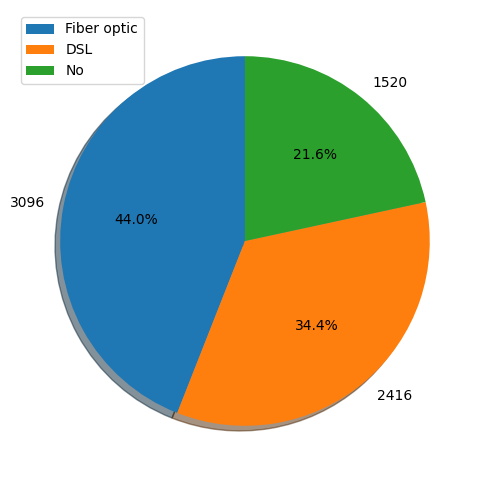

In [18]:
Internet = df['InternetService'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(Internet, 
        labels = Internet.values,
        autopct ='%1.1f%%',
        shadow = True,
        startangle = 90,
        )
plt.legend(Internet.index)
plt.show()

<Axes: xlabel='InternetService'>

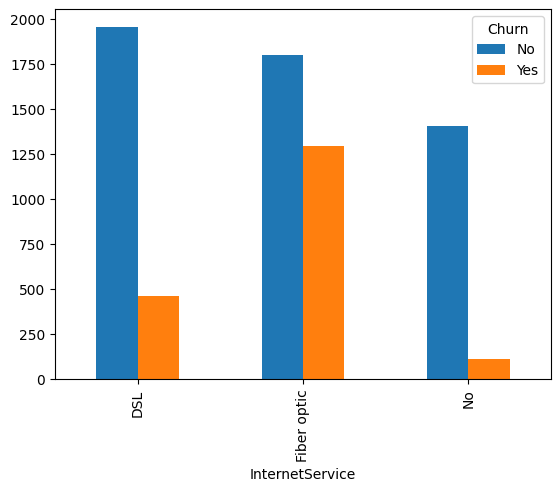

In [19]:
pd.crosstab(df['InternetService'], df['Churn']).plot(kind='bar')

### Security & Support

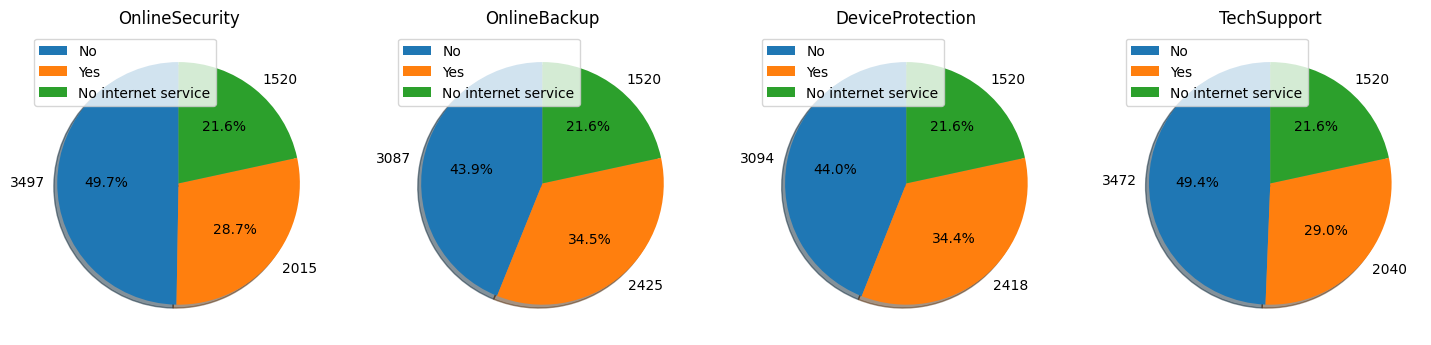

In [20]:
Security = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

plt.figure(figsize=(18,12))
for i in range(0,4):
    col_data = df[Security[i]].value_counts()
    plt.subplot(1,4,i+1)
    plt.pie(col_data, 
            labels = col_data.values,
            autopct ='%1.1f%%',
            shadow = True,
            startangle = 90,
            )
    plt.legend(col_data.index)
    plt.title(label=f'{Security[i]}')

### Streaming

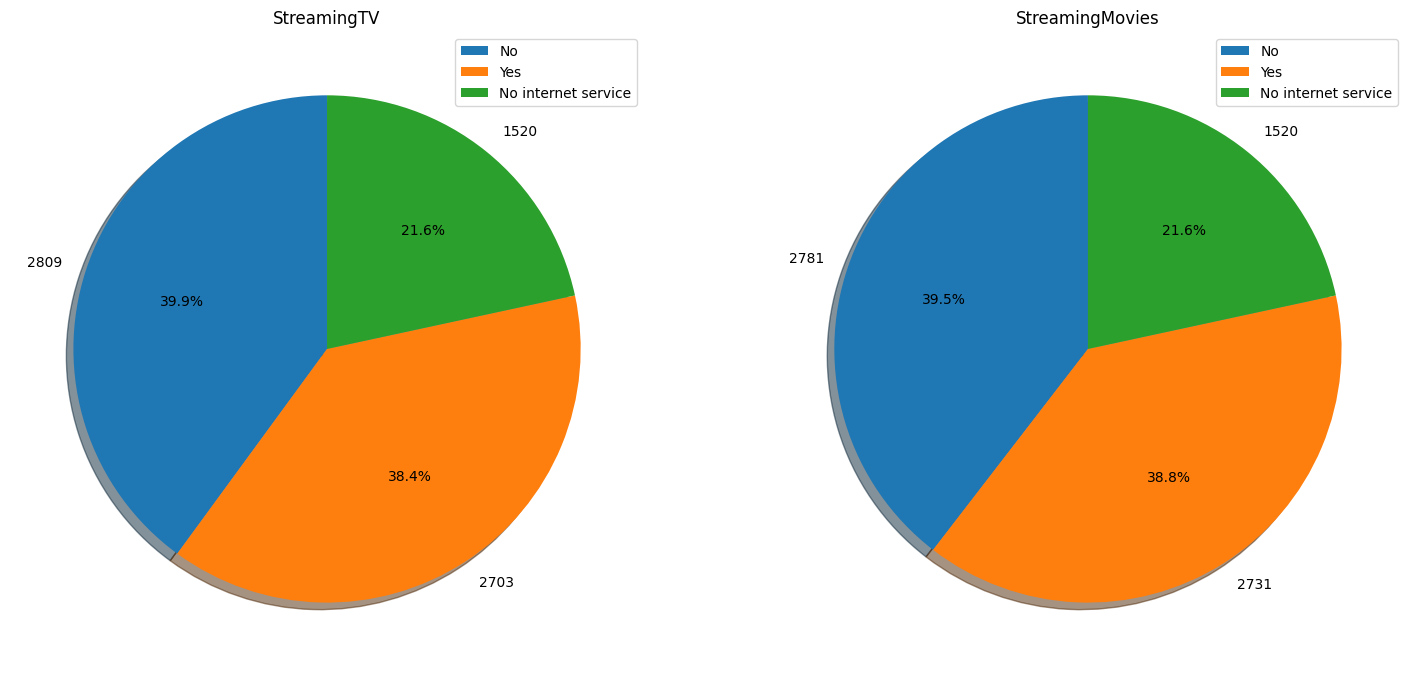

In [21]:
Streaming = ['StreamingTV', 'StreamingMovies']

plt.figure(figsize=(18,12))
for i in range(0,2):
    col_data = df[Streaming[i]].value_counts()
    plt.subplot(1,2,i+1)
    plt.pie(col_data, 
            labels = col_data.values,
            autopct ='%1.1f%%',
            shadow = True,
            startangle = 90,
            )
    plt.legend(col_data.index)
    plt.title(label=f'{Streaming[i]}')

### Billing

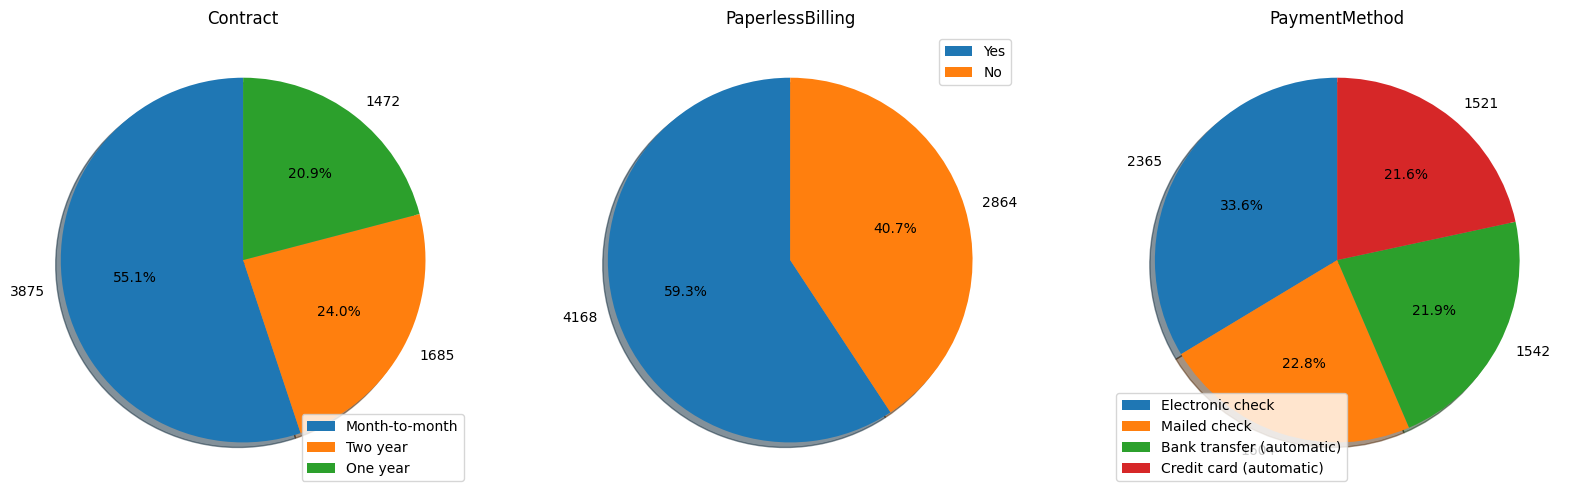

In [22]:
Billing = ['Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(20,9))
for i in range(0,3):
    col_data = df[Billing[i]].value_counts()
    plt.subplot(1,3,i+1)
    plt.pie(col_data, 
            labels = col_data.values,
            autopct ='%1.1f%%',
            shadow = True,
            startangle = 90,
            )
    plt.legend(col_data.index)
    plt.title(label=f'{Billing[i]}')

<Axes: xlabel='Contract'>

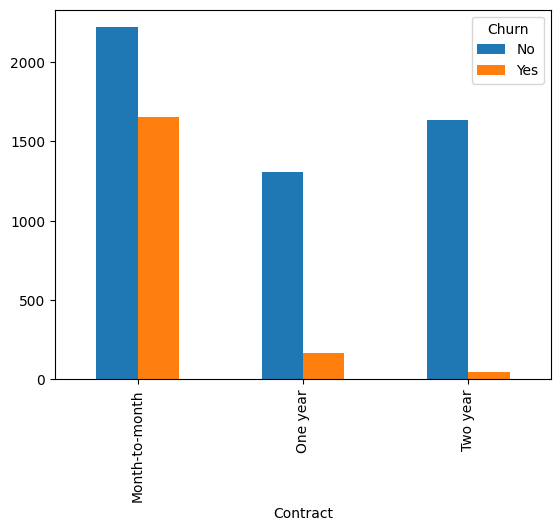

In [23]:
pd.crosstab(df['Contract'], df['Churn']).plot(kind='bar')

<Axes: xlabel='PaymentMethod'>

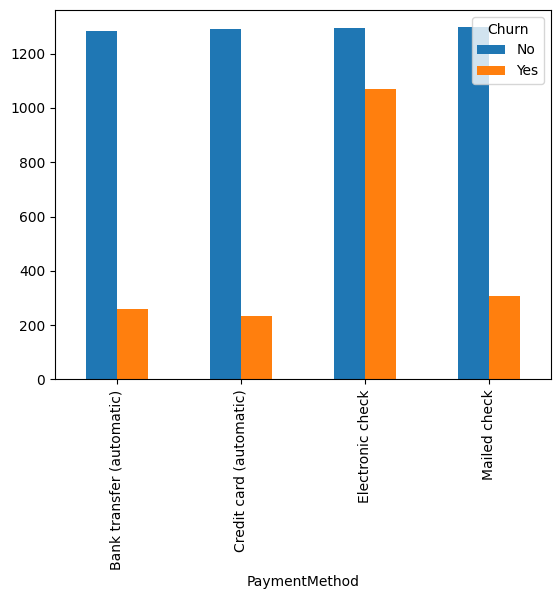

In [24]:
pd.crosstab(df['PaymentMethod'], df['Churn']).plot(kind='bar')

## Numeric Data

<Axes: xlabel='Churn', ylabel='tenure'>

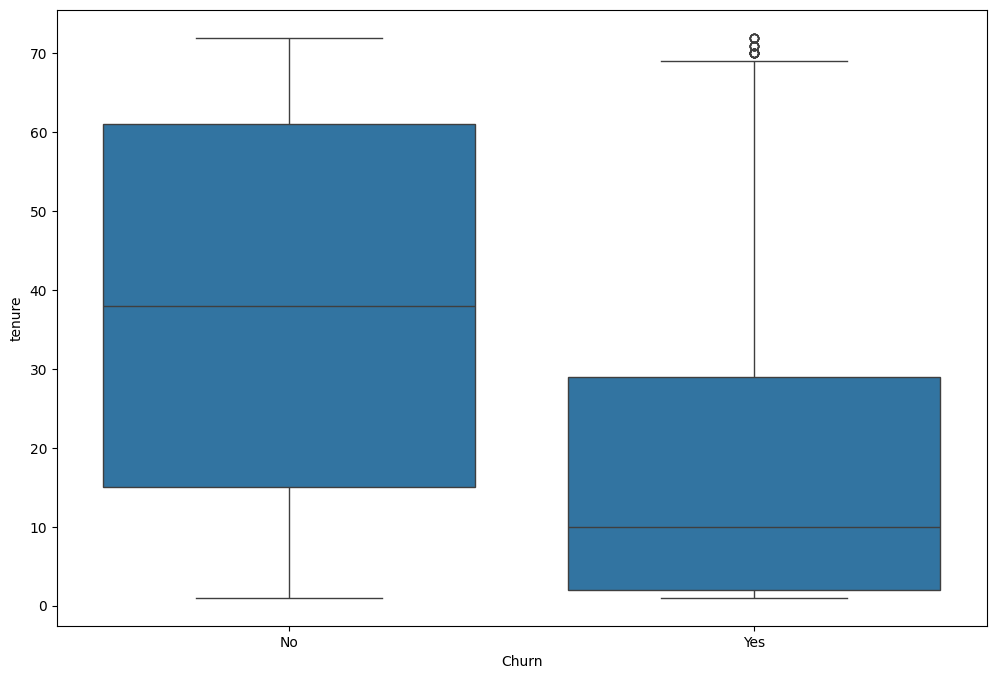

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(df,x="Churn",y="tenure")

Text(0.5, 1.0, 'TotalCharges Distribution')

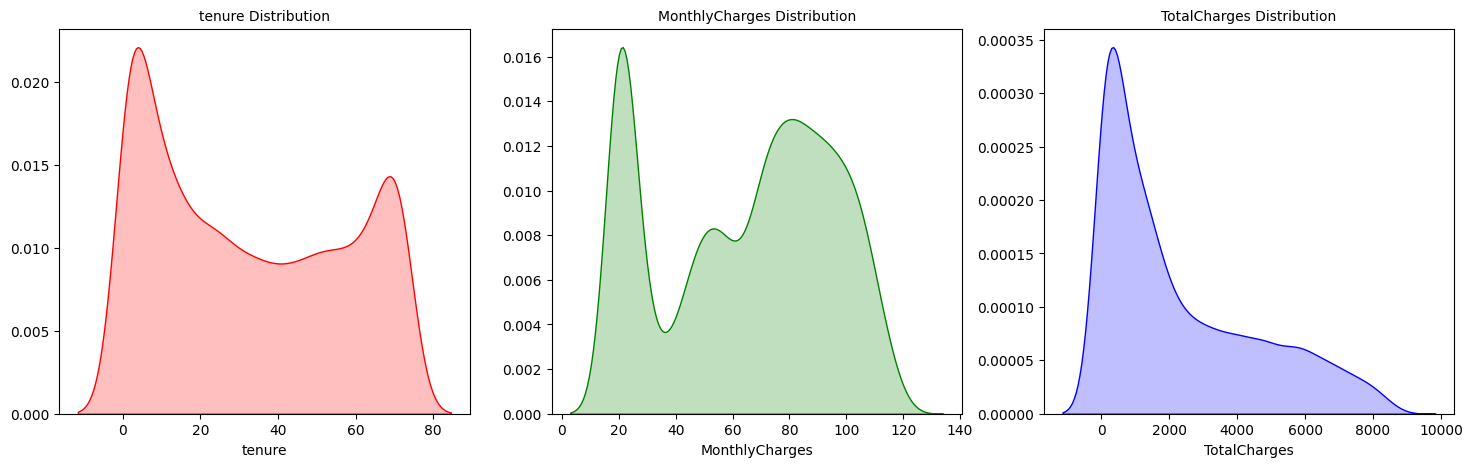

In [26]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.kdeplot(df["tenure"],fill=True, color='r')
plt.ylabel('')
plt.title("tenure Distribution",size=10)
plt.subplot(1,3,2)
sns.kdeplot(df["MonthlyCharges"],fill=True, color='g')
plt.ylabel('')
plt.title("MonthlyCharges Distribution",size=10)
plt.subplot(1,3,3)
sns.kdeplot(df["TotalCharges"],fill=True, color='b')
plt.ylabel('')
plt.title("TotalCharges Distribution",size=10)